In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
car_plate = cv2.imread('../DATA/car_plate.jpg')

In [4]:
def display(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

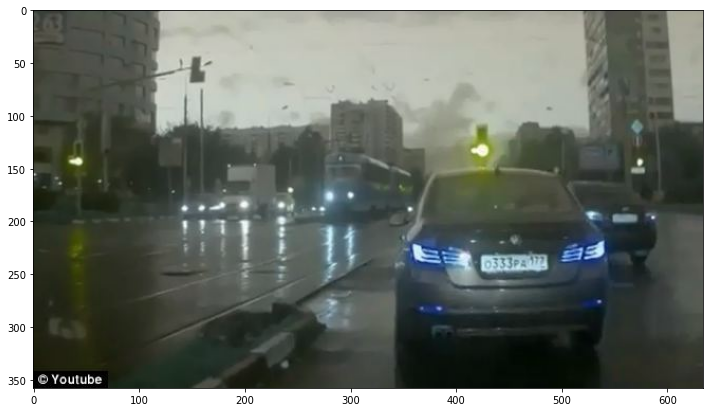

In [5]:
display(car_plate)

In [6]:
russian_plate = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [11]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = russian_plate.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in plate_rects:
        cv2.rectangle(plate_img, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return plate_img

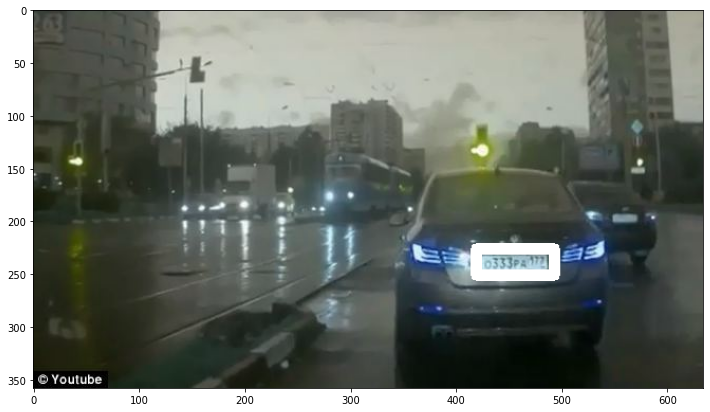

In [12]:
result = detect_plate(car_plate)
display(result)

In [14]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()

    plate_rects = russian_plate.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)

    for (x, y, w, h) in plate_rects:
        roi = roi[y:y + h, x:x + w]
        blurred_roi = cv2.medianBlur(roi, 7)
        plate_img[y:y + h, x:x + w] = blurred_roi
    return plate_img

In [15]:
result = detect_and_blur_plate(car_plate)

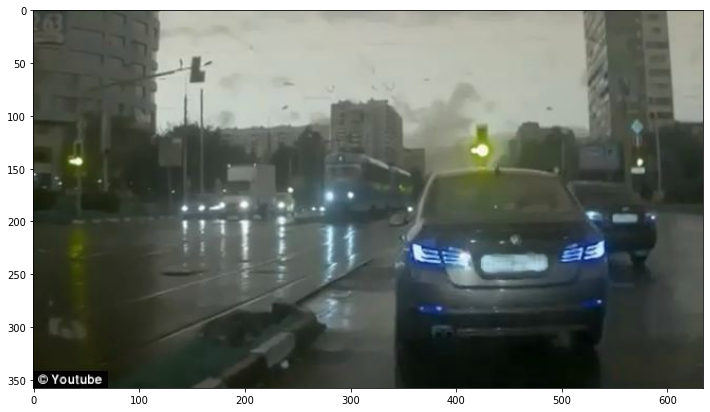

In [16]:
display(result)